In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [3]:
df = pd.read_csv("data/survey_results_public.csv").set_index("ResponseId")

In [4]:
df.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 1 to 65437
Data columns (total 113 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    MainBranch                      object 
 1    Age                             object 
 2    Employment                      object 
 3    RemoteWork                      object 
 4    Check                           object 
 5    CodingActivities                object 
 6    EdLevel                         object 
 7    LearnCode                       object 
 8    LearnCodeOnline                 object 
 9    TechDoc                         object 
 10   YearsCode                       object 
 11   YearsCodePro                    object 
 12   DevType                         object 
 13   OrgSize                         object 
 14   PurchaseInfluence               object 
 15   BuyNewTool                      object 
 16   BuildvsBuy                      object 
 17   TechEndorse    

In [6]:
drop_col = df.isnull().sum().sort_values(ascending=False)

In [7]:
cols = drop_col[drop_col > int(len(df.index)/2)].index.to_list()

In [8]:
cols.remove("ConvertedCompYearly")

In [9]:
df.drop(columns=cols, inplace=True)

In [10]:
df.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,AIAcc,AIComplex,AIToolCurrently Using,AIThreat,AIEthics,AIChallenges,TBranch,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Appropriate in length,Easy,NaN
4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,Somewhat trust,Bad at handling complex tasks,Learning about a codebase;Project planning;Wri...,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers,NaN,Too long,Easy,NaN
5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN


In [11]:
df.isnull().sum().sort_values(ascending=False)

ConvertedCompYearly       42002
MiscTechWantToWorkWith    32473
CompTotal                 31697
PlatformWantToWorkWith    30905
WebframeAdmired           30494
                          ...  
AISelect                   4530
Check                         0
Employment                    0
Age                           0
MainBranch                    0
Length: 70, dtype: int64

In [12]:
df_salary = df[df["ConvertedCompYearly"].notnull()]

In [13]:
df_salary.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,AIAcc,AIComplex,AIToolCurrently Using,AIThreat,AIEthics,AIChallenges,TBranch,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,Somewhat trust,"Good, but not great at handling complex tasks",Learning about a codebase;Writing code;Documen...,No,Circulating misinformation or disinformation;M...,"AI tools lack context of codebase, internal a...",Yes,Too long,Easy,7322.0
375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Appropriate in length,Neither easy nor difficult,30074.0
380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,API document(s) and/or SDK document(s),...,Somewhat trust,Bad at handling complex tasks,Writing code;Documenting code;Debugging and ge...,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;Lack of exec...,Yes,Too long,Difficult,91295.0
386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);First-p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0
390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,...,Neither trust nor distrust,Neither good or bad at handling complex tasks,Learning about a codebase;Writing code;Documen...,No,Circulating misinformation or disinformation;E...,"AI tools lack context of codebase, internal a...",Yes,Too long,Easy,110000.0


In [14]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 73 to 41188
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      23435 non-null  object 
 1   Age                             23435 non-null  object 
 2   Employment                      23435 non-null  object 
 3   RemoteWork                      23427 non-null  object 
 4   Check                           23435 non-null  object 
 5   CodingActivities                23429 non-null  object 
 6   EdLevel                         23435 non-null  object 
 7   LearnCode                       23403 non-null  object 
 8   LearnCodeOnline                 19306 non-null  object 
 9   TechDoc                         16655 non-null  object 
 10  YearsCode                       23388 non-null  object 
 11  YearsCodePro                    23345 non-null  object 
 12  DevType                         2340

In [15]:
df_salary.isnull().sum().sort_values(ascending=False)

MiscTechWantToWorkWith    9825
AIToolCurrently Using     9108
AIBen                     8816
AISearchDevAdmired        8716
AIComplex                 8710
                          ... 
Country                      0
EdLevel                      0
Check                        0
Employment                   0
ConvertedCompYearly          0
Length: 70, dtype: int64

In [16]:
card = df_salary.nunique().sort_values(ascending=False)
card = card[card > 100]
list_c = card.index.tolist()
list_c.append("SurveyLength")
list_c.append("SurveyEase")
list_c.remove("ConvertedCompYearly")

In [17]:
df_salary.drop(columns=list_c, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13192\3818006269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary.drop(columns=list_c, inplace=True)


In [18]:
col_mode = df_salary.isnull().sum().sort_values(ascending=False)
col_mode = col_mode[col_mode>0].index.to_list()

In [19]:
for col in col_mode:
    mode_val = df_salary[col].mode().iloc[0]
    df_salary[col].fillna(mode_val, inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_13192\2246816543.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_salary[col].fillna(mode_val, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_13192\2246816543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary[col].fillna(mode_val, inplace=True)


In [20]:
df_salary.head()

,MainBranch,Age,Employment,RemoteWork,Check,EdLevel,TechDoc,YearsCode,YearsCodePro,DevType,...,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIThreat,TBranch,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,"Secondary school (e.g. American high school, G...",API document(s) and/or SDK document(s);User gu...,3,1,Data scientist or machine learning specialist,...,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat",Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,"Good, but not great at handling complex tasks",No,Yes,7322.0
375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",API document(s) and/or SDK document(s);User gu...,12,6,Academic researcher,...,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat","No, and I don't plan to",Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Bad at handling complex tasks,No,No,30074.0
380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",API document(s) and/or SDK document(s),15,6,Data scientist or machine learning specialist,...,Quickly finding code solutions,"No, not at all",Yes,Very favorable,Increase productivity;Greater efficiency,Somewhat trust,Bad at handling complex tasks,No,Yes,91295.0
386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",API document(s) and/or SDK document(s);First-p...,27,17,"Developer, back-end",...,Finding reliable guidance from community-vette...,"Yes, somewhat","No, and I don't plan to",Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Bad at handling complex tasks,No,Yes,53703.0
390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Some college/university study without earning ...,API document(s) and/or SDK document(s);User gu...,7,7,Student,...,Quickly finding code solutions,"Yes, somewhat",Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Neither trust nor distrust,Neither good or bad at handling complex tasks,No,Yes,110000.0


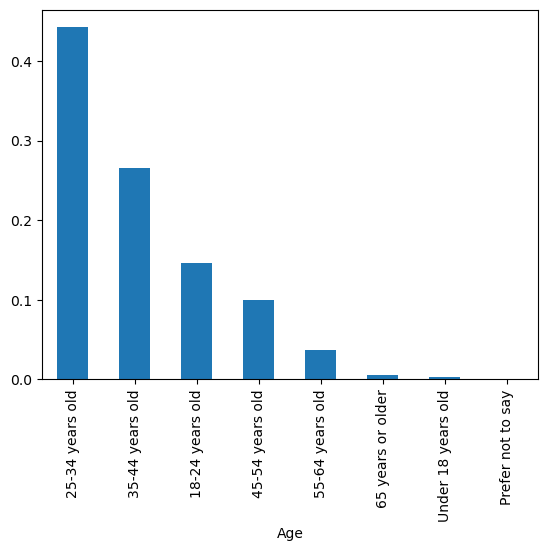

In [21]:
df_salary["Age"].value_counts(normalize=True).plot(kind="bar");

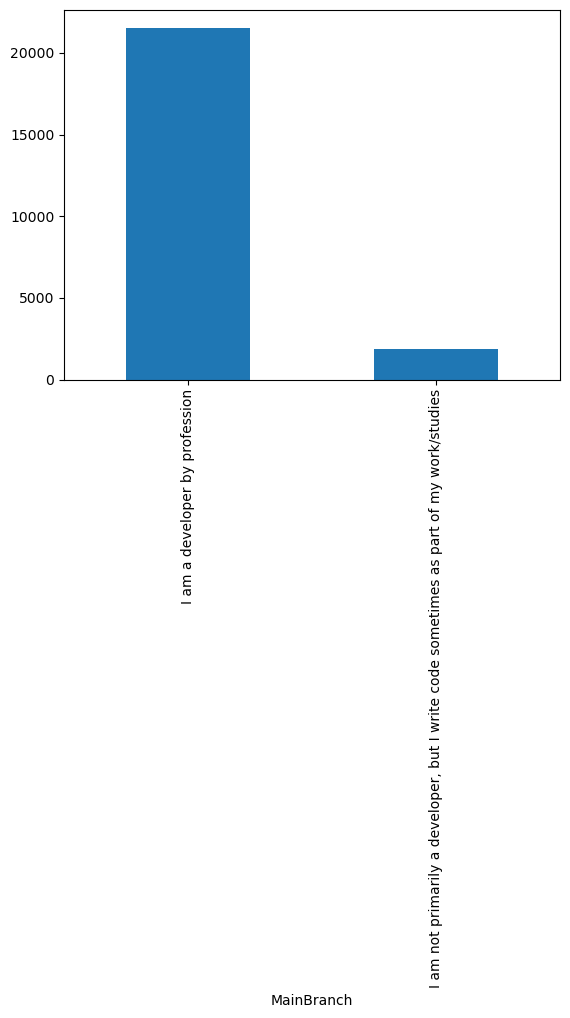

In [22]:
df_salary["MainBranch"].value_counts().plot(kind="bar");

<Axes: xlabel='Employment'>

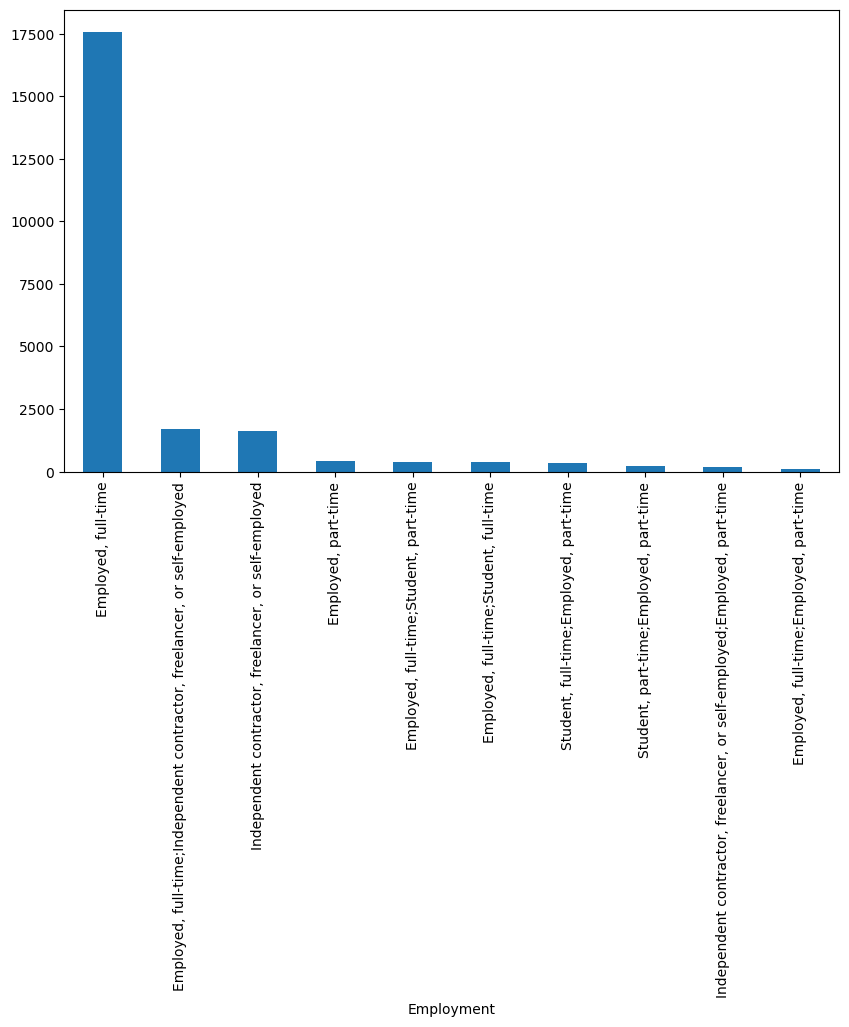

In [23]:
employment_counts = df_salary["Employment"].value_counts()
employment_filtered = employment_counts[employment_counts >= 100]

employment_filtered.plot(kind="bar", figsize=(10, 6))

In [24]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 73 to 41188
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           23435 non-null  object 
 1   Age                  23435 non-null  object 
 2   Employment           23435 non-null  object 
 3   RemoteWork           23435 non-null  object 
 4   Check                23435 non-null  object 
 5   EdLevel              23435 non-null  object 
 6   TechDoc              23435 non-null  object 
 7   YearsCode            23435 non-null  object 
 8   YearsCodePro         23435 non-null  object 
 9   DevType              23435 non-null  object 
 10  OrgSize              23435 non-null  object 
 11  PurchaseInfluence    23435 non-null  object 
 12  BuildvsBuy           23435 non-null  object 
 13  NEWSOSites           23435 non-null  object 
 14  SOVisitFreq          23435 non-null  object 
 15  SOAccount            23435 non-null  obj

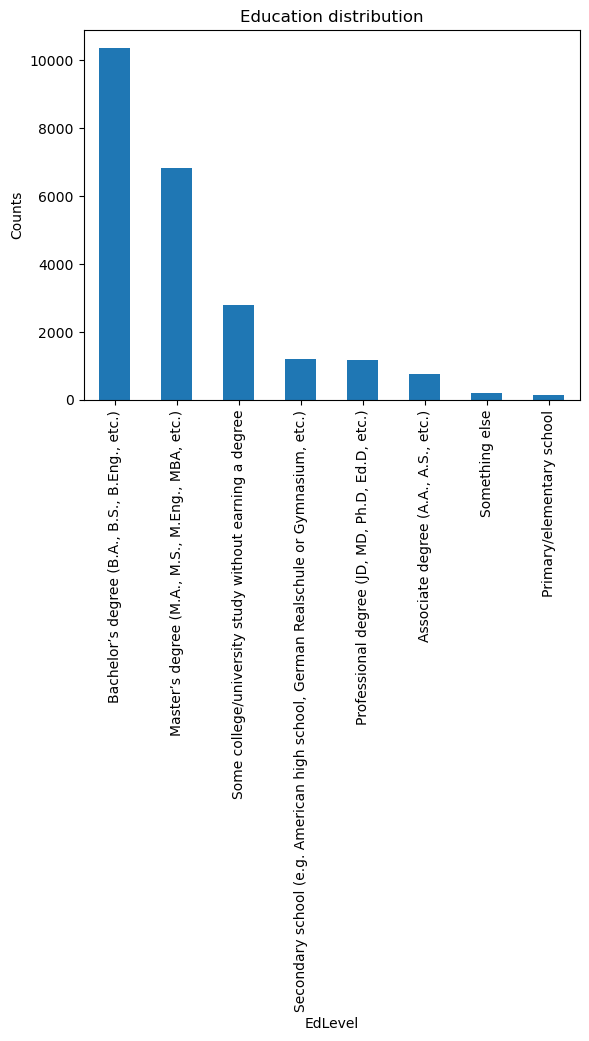

In [25]:
df_salary["EdLevel"].value_counts().plot(kind="bar")

plt.title("Education distribution")
plt.ylabel("Counts");

In [26]:
df_em_ed = df_salary.groupby(["EdLevel", "Employment"]).size().unstack().reset_index().melt(id_vars="EdLevel", var_name="Employment", value_name="count")

In [27]:
df_em_ed = df_em_ed[df_em_ed["count"]>100]

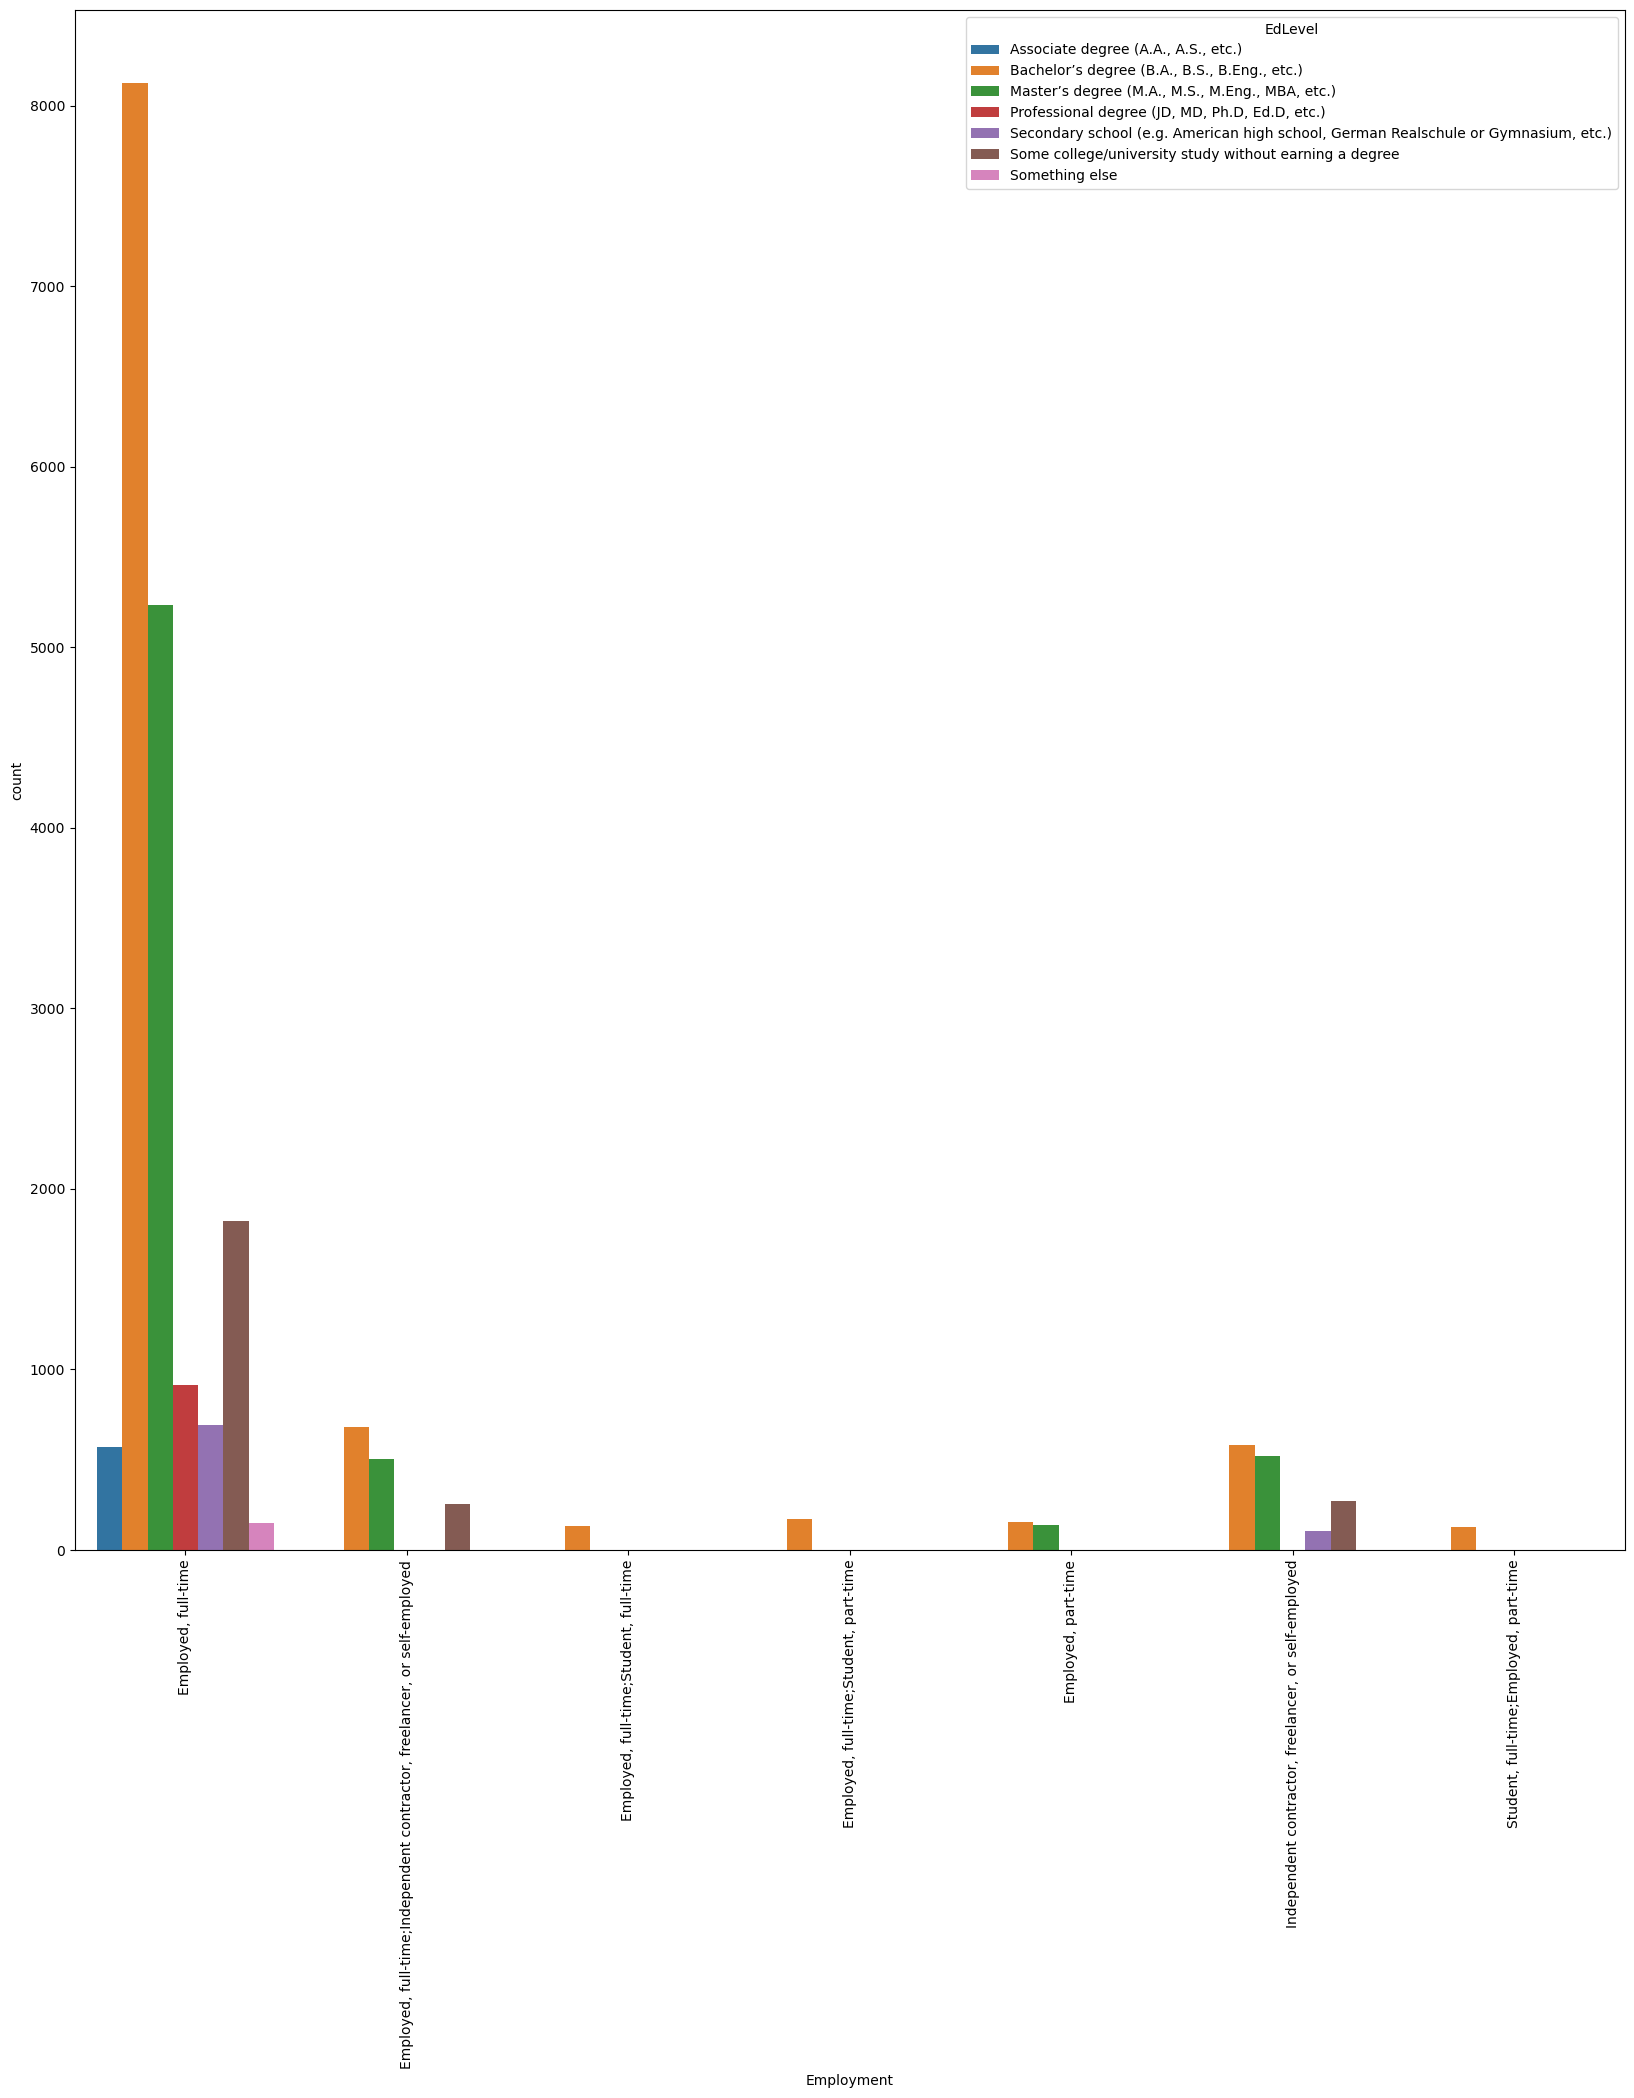

In [28]:
plt.figure(figsize=(20, 20))
sns.barplot(data=df_em_ed, x="Employment", y="count", hue="EdLevel")
plt.xticks(rotation=90);

In [29]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 73 to 41188
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           23435 non-null  object 
 1   Age                  23435 non-null  object 
 2   Employment           23435 non-null  object 
 3   RemoteWork           23435 non-null  object 
 4   Check                23435 non-null  object 
 5   EdLevel              23435 non-null  object 
 6   TechDoc              23435 non-null  object 
 7   YearsCode            23435 non-null  object 
 8   YearsCodePro         23435 non-null  object 
 9   DevType              23435 non-null  object 
 10  OrgSize              23435 non-null  object 
 11  PurchaseInfluence    23435 non-null  object 
 12  BuildvsBuy           23435 non-null  object 
 13  NEWSOSites           23435 non-null  object 
 14  SOVisitFreq          23435 non-null  object 
 15  SOAccount            23435 non-null  obj

In [30]:
years_code = df_salary["YearsCode"].value_counts()
years_code_pro = df_salary["YearsCodePro"].value_counts()

df_year = pd.DataFrame({
    "YearsCode": years_code,
    "YearsCodePro": years_code_pro
}).fillna(0)

df_year

,YearsCode,YearsCodePro
1,60,972
10,2130,1541
11,780,668
12,1184,870
13,709,567
14,882,514
15,1318,746
16,633,445
17,506,398
18,585,384


<Axes: >

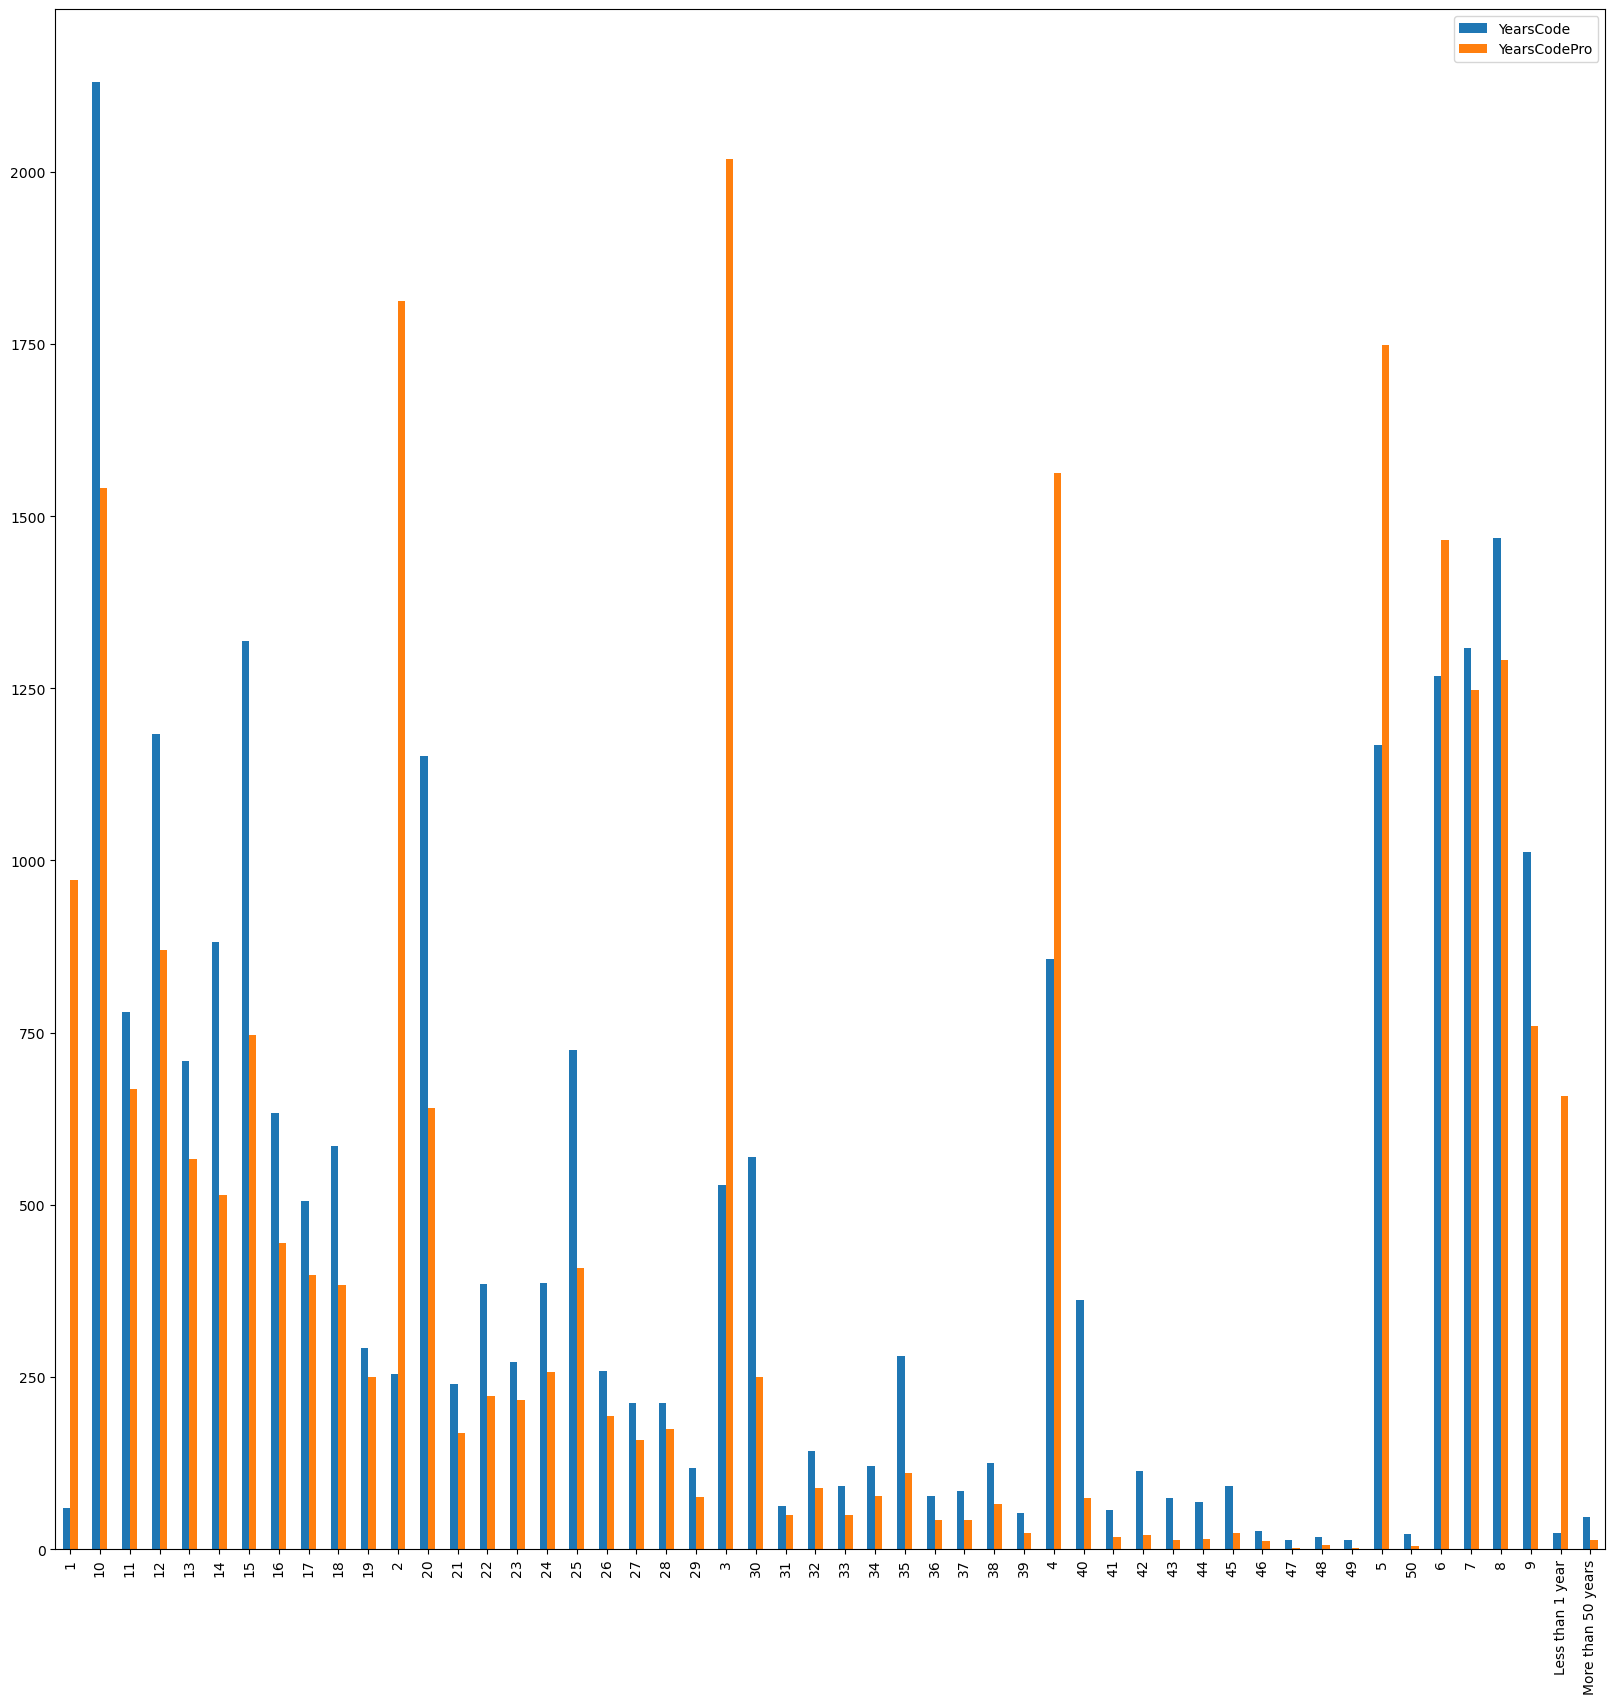

In [31]:
df_year.plot(kind="bar", figsize=(20, 20))

In [32]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 73 to 41188
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           23435 non-null  object 
 1   Age                  23435 non-null  object 
 2   Employment           23435 non-null  object 
 3   RemoteWork           23435 non-null  object 
 4   Check                23435 non-null  object 
 5   EdLevel              23435 non-null  object 
 6   TechDoc              23435 non-null  object 
 7   YearsCode            23435 non-null  object 
 8   YearsCodePro         23435 non-null  object 
 9   DevType              23435 non-null  object 
 10  OrgSize              23435 non-null  object 
 11  PurchaseInfluence    23435 non-null  object 
 12  BuildvsBuy           23435 non-null  object 
 13  NEWSOSites           23435 non-null  object 
 14  SOVisitFreq          23435 non-null  object 
 15  SOAccount            23435 non-null  obj

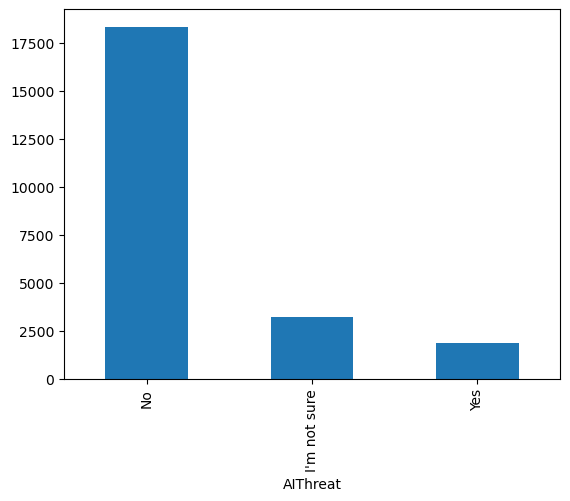

In [33]:
df_salary["AIThreat"].value_counts().plot(kind="bar");

In [34]:
df_salary.select_dtypes(include=["float", "int"])

,ConvertedCompYearly
ResponseId,
73,7322.0
375,30074.0
380,91295.0
386,53703.0
390,110000.0
...,...
41181,44640.0
41185,170000.0
41186,116844.0


In [46]:
y = df_salary[df_salary.columns[-1]]
X = df_salary[df_salary.columns[:len(df_salary.columns)-1]]

In [48]:
num = X.select_dtypes(include=["float", "int"]).columns.tolist()
cat = X.select_dtypes(include=["object"]).columns.tolist()

In [50]:
preprocess = ColumnTransformer(
    transformers =[
        ("num", StandardScaler(), num),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat)
    ]
)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
pipeline = make_pipeline(preprocess, LinearRegression())

In [56]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

287801.705073324

In [60]:
mean_absolute_error(y_test, y_pred)

55072.53719491399

In [62]:
r2_score(y_test, y_pred)

0.004971372166727384

In [66]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 73 to 41188
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           23435 non-null  object 
 1   Age                  23435 non-null  object 
 2   Employment           23435 non-null  object 
 3   RemoteWork           23435 non-null  object 
 4   Check                23435 non-null  object 
 5   EdLevel              23435 non-null  object 
 6   TechDoc              23435 non-null  object 
 7   YearsCode            23435 non-null  object 
 8   YearsCodePro         23435 non-null  object 
 9   DevType              23435 non-null  object 
 10  OrgSize              23435 non-null  object 
 11  PurchaseInfluence    23435 non-null  object 
 12  BuildvsBuy           23435 non-null  object 
 13  NEWSOSites           23435 non-null  object 
 14  SOVisitFreq          23435 non-null  object 
 15  SOAccount            23435 non-null  obj

In [124]:
df_clean = df_salary[["Age", "Employment", "EdLevel", "OrgSize", "YearsCode", "YearsCodePro", "ConvertedCompYearly"]]

In [126]:
y = df_clean[df_clean.columns[-1]]
X = df_clean[df_clean.columns[:len(df_clean.columns)-1]]

In [128]:
num = X.select_dtypes(include=["float", "int"]).columns.tolist()
cat = X.select_dtypes(include=["object"]).columns.tolist()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [132]:
def fix_years(x):
    try:
        return float(x)
    except:
        if "Less" in str(x): return 0.5
        if "More" in str(x): return 50
        return np.nan

df_clean["YearsCode"] = df_clean["YearsCode"].apply(fix_years)
df_clean["YearsCodePro"] = df_clean["YearsCodePro"].apply(fix_years)

age_map = {
    "Under 18": 16, "18-24": 21, "25-34": 29.5, "35-44": 39.5,
    "45-54": 49.5, "55-64": 59.5, "65 or older": 70, "Prefer not to say": np.nan
}
df_clean["Age"] = df_clean["Age"].map(age_map)


C:\Users\admin\AppData\Local\Temp\ipykernel_13192\2479636011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["YearsCode"] = df_clean["YearsCode"].apply(fix_years)
C:\Users\admin\AppData\Local\Temp\ipykernel_13192\2479636011.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["YearsCodePro"] = df_clean["YearsCodePro"].apply(fix_years)
C:\Users\admin\AppData\Local\Temp\ipykernel_13192\2479636011.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [134]:
preprocess = ColumnTransformer(
    transformers =[
        ("num", StandardScaler(), num),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat)
    ]
)

In [136]:
p2 = make_pipeline(preprocess, LinearRegression())
p2.fit(X_train, y_train)
y_c_pred = p2.predict(X_test)

C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\admin\anaconda3\envs\HeartDisease\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
r2_score(y_test, y_pred)

In [93]:
mean_absolute_error(y_test, y_pred)

55072.53719491399

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

287801.705073324